In [1]:
#coding:utf-8
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import sys, cv2
from numpy.core.numerictypes import ScalarType

#Jupyterでインライン表示するための宣言
#%matplotlib inline

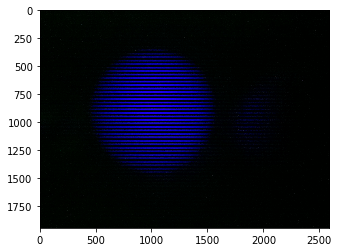

<class 'numpy.ndarray'>
(1944, 2592)
<class 'tuple'>


In [2]:
#画像の読み込み
im = cv2.imread("./image.jpg")
plt.imshow(im)
plt.show()
print(type(im))
print(im.shape[:2])
print(type(im.shape[:2]))
width,height = im.shape[:2]
SCALE = 0.4 # 画像のリサイズ

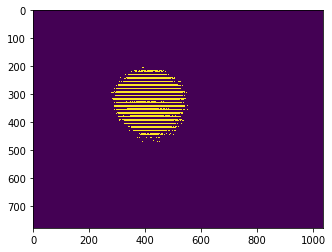

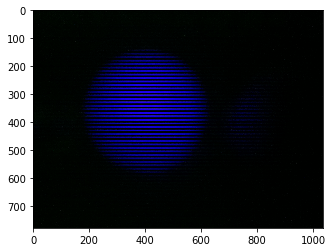

In [3]:
#画像のリサイズ
im_resize = cv2.resize(im,(int(height*SCALE),int(width*SCALE)))
#画像のグレースケール化
im_gray = cv2.cvtColor(im_resize,cv2.COLOR_BGR2GRAY)
#画像の二値化
TH = 60 #今はまだ手動
ret, im_gray_th = cv2.threshold(im_gray,TH,255,cv2.THRESH_BINARY)
#cv2.imshow('image',im_gray)
plt.imshow(im_gray_th)
plt.show()
plt.imshow(im_resize)
plt.show()

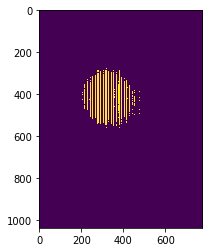

In [4]:
#画像をarrayに変換
im_list = np.asarray(im_gray_th)#二次元配列に変換
#im_list
plt.imshow(im_list.T)
plt.show()

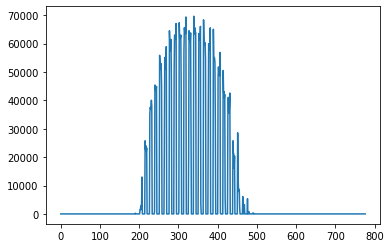

In [5]:
#画像を積分
sig_col=np.sum(im_list,axis=1)#列方向に足し合わせる
#sig_row=np.sum(im_list,axis=0)#行方向に足し合わせる
max_sig = max(sig_col)
max_sig
min_sig = min(sig_col)
min_sig
sig_col.mean()
#貼り付け
plt.plot(sig_col)
plt.show()
#表示
#plt.plot(sig_row)
#plt.show()


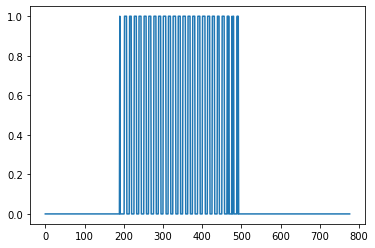

In [6]:
#波形の正規化
sig_norm = sig_col
for i in range(sig_norm.size):
    if(sig_norm[i] > 0):#値が0以上であれば正規化
         sig_norm[i] = 1
    else:
        sig_norm[i] = 0
plt.plot(sig_norm)
#sig_norm

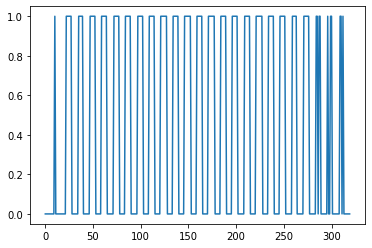

In [7]:
#波形の切り出し
index_st = 180 #まだ手動
index_ed = 500 #まだ手動
sig_crip = sig_norm[index_st:index_ed:1]
plt.plot(sig_crip)
plt.show()
